# Bibliotecas

In [419]:
# Importar as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dados

Célula para executar o código utilizando o Excel. Caso vá ser utilizado Google Sheets, mantenha esta célula comentada.

In [420]:
# Definindo a planilha que será aberta

nome_arquivo = "Tabelas finais estimativa market share - maio.xlsx" # Insira o path do arquivo da planilha com dados


df_mkt = pd.read_excel(nome_arquivo,sheet_name=1)
df_tra = pd.read_excel(nome_arquivo,sheet_name=0)
df_pist = pd.read_excel(nome_arquivo,sheet_name=2)
df_tra.rename(columns=str.strip,inplace=True)
df_mkt.iloc[:,2].replace("",np.nan,inplace=True)
df_mkt.iloc[:,3].replace("",np.nan,inplace=True)
df_mkt.iloc[:,4].replace("",np.nan,inplace=True)
df_mkt.iloc[:,5].replace("",np.nan,inplace=True)
df_mkt.iloc[:,6].replace("",np.nan,inplace=True)
df_mkt.dropna(inplace=True)


Célula para executar o código utilizando o Google Sheets. Caso vá ser utilizado Excel, mantenha esta célula comentada.

In [421]:
#Importação de bibliotecas para o Google Sheets
'''
import gspread
from google.colab import auth
from google.auth import default
'''
# Autenticar no google para acessar a planilha no google planilhas
'''auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
'''

# Definindo a planilha que será aberta
'''
nome_arquivo = "Tabelas finais estimativa market share" # Insira o nome de como esta salva a planilha no google sheets
worksheet = gc.open(nome_arquivo)
rows = worksheet.worksheets()
tabela_base = worksheet.worksheet("Tabela 1 (Base ConectCar)") # Planilha com os dados de transações da ConectCar
tabela_mkt = worksheet.worksheet("Tabela 2 (MarketShares)") # Planilha com os dados de market share das empresas de tag
tabela_pist = worksheet.worksheet("Tabela 3 (Pistas)") # Planilha com os dados da quantidades de pistas por estado
df_tra = pd.DataFrame(tabela_base.get_all_records())
df_mkt = pd.DataFrame(tabela_mkt.get_all_records())
df_pist = pd.DataFrame(tabela_pist.get_all_records())
df_tra.rename(columns=str.strip,inplace=True)
df_mkt.iloc[:,2].replace("",np.nan,inplace=True)
df_mkt.iloc[:,3].replace("",np.nan,inplace=True)
df_mkt.iloc[:,4].replace("",np.nan,inplace=True)
df_mkt.iloc[:,5].replace("",np.nan,inplace=True)
df_mkt.iloc[:,6].replace("",np.nan,inplace=True)
df_mkt.dropna(inplace=True)
'''

'\nnome_arquivo = "Tabelas finais estimativa market share" # Insira o nome de como esta salva a planilha no google sheets\nworksheet = gc.open(nome_arquivo)\nrows = worksheet.worksheets()\ntabela_base = worksheet.worksheet("Tabela 1 (Base ConectCar)") # Planilha com os dados de transações da ConectCar\ntabela_mkt = worksheet.worksheet("Tabela 2 (MarketShares)") # Planilha com os dados de market share das empresas de tag\ntabela_pist = worksheet.worksheet("Tabela 3 (Pistas)") # Planilha com os dados da quantidades de pistas por estado\ndf_tra = pd.DataFrame(tabela_base.get_all_records())\ndf_mkt = pd.DataFrame(tabela_mkt.get_all_records())\ndf_pist = pd.DataFrame(tabela_pist.get_all_records())\ndf_tra.rename(columns=str.strip,inplace=True)\ndf_mkt.iloc[:,2].replace("",np.nan,inplace=True)\ndf_mkt.iloc[:,3].replace("",np.nan,inplace=True)\ndf_mkt.iloc[:,4].replace("",np.nan,inplace=True)\ndf_mkt.iloc[:,5].replace("",np.nan,inplace=True)\ndf_mkt.iloc[:,6].replace("",np.nan,inplace=True)\n

In [422]:
df_tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   razaosocial    1396 non-null   object
 1   GRUPO          1396 non-null   object
 2   ano_mes        1396 non-null   int64 
 3   qtdtransacoes  1396 non-null   int64 
 4   uf             1393 non-null   object
dtypes: int64(2), object(3)
memory usage: 54.7+ KB


In [423]:
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 252
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   concessionaria_razaosocial  249 non-null    object 
 1   ano_mes                     249 non-null    int64  
 2   CGMP                        249 non-null    float64
 3   ConectCar                   249 non-null    float64
 4   MoveMais                    249 non-null    float64
 5   VELOE                       249 non-null    float64
 6   GreenPass                   249 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [424]:
df_pist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uf           16 non-null     object
 1    qtd_pistas  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


# Tratamento necessário

In [425]:
# Nomes das estradas e concessões corretos após o tratamento
estradas = ["Rota 116","Rota de Santa Maria","Tietê","Bahia Norte","Rota dos Coqueiros","Rota do Atlântico","Rota do Oeste","Rota das Bandeiras",
            "Via Bahia","Rodovia do Aço","Tamoios","Via 040"] 
prin_conc = ["ccr","ecorodovias","egr"]
df_tra["Razaosocial_a"] = (df_tra["razaosocial"]
                      .str
                      .replace(r'\s+', " ", regex=True)
                      .replace("CONCESSIONARIA","",regex=True)
                      .replace("S.A","",regex=True)
                      .replace(r'\t','', regex=True)
                      .replace("SA","",regex=True)
                      .replace(r"\.","",regex=True)
                      .str.lower()
                      .str.replace("  ","",regex=True)
                      .replace(" rota 116","Rota 116",regex=True)
                      .replace("concessionária rota de santa maria","Rota de Santa Maria",regex=True)
                      .replace(" rodovias do tiete","Tietê",regex=True)
                      .replace(" bahia norte","Bahia Norte",regex=True)
                      .replace(" rota dos coqueiros","Rota dos Coqueiros",regex=True)
                      .replace(" rota do atlantico","Rota do Atlântico",regex=True)
                      .replace(" rota do oeste","Rota do Oeste",regex=True)
                      .replace(" rota das bandeiras","Rota das Bandeiras",regex=True)
                      .replace("viabahiade rodovias","Via Bahia",regex=True)
                      .replace("acciona concessoes rodovia do aco","Rodovia do Aço",regex=True)
                      .replace(" rodovia dos tamoios","Tamoios",regex=True)
                      .replace(" br-040","Via 040",regex=True))
df_tra["Concessao_a"] = (df_tra["GRUPO"].str.lower())
n = df_tra.shape[0]
selecter_rows = []
select_conces = []
# Filtro das estradas que não pertencem às concessionárias e rodovias listadas acima
for i in range(0,n):
  if (df_tra.iloc[i,5] in estradas) or (df_tra.iloc[i,6] in prin_conc):
    selecter_rows.append(i)
    if (df_tra.iloc[i,5] in estradas):
      select_conces.append(df_tra.iloc[i,5])
    else:
      select_conces.append(df_tra.iloc[i,6])
df_trat_transaco = df_tra.iloc[selecter_rows,:]
df_trat_transaco.loc[:,"New_Concess"] = select_conces
df_trat_transaco.loc[:,"New_Concess_Trat"] = (df_trat_transaco["New_Concess"]
                                        .str
                                        .replace("ecorodovias","Ecorodovias", regex=True)
                                        .replace("ccr","CCR",regex=True)
                                        .replace("egr","EGR",regex=True))

C:\Users\raul.correa\AppData\Local\Temp\ipykernel_20716\3247591203.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trat_transaco.loc[:,"New_Concess"] = select_conces
C:\Users\raul.correa\AppData\Local\Temp\ipykernel_20716\3247591203.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trat_transaco.loc[:,"New_Concess_Trat"] = (df_trat_transaco["New_Concess"]


In [426]:
df_tra.columns

Index(['razaosocial', 'GRUPO', 'ano_mes', 'qtdtransacoes', 'uf',
       'Razaosocial_a', 'Concessao_a'],
      dtype='object')

In [427]:
df_trat_transaco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 224 to 1391
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   razaosocial       597 non-null    object
 1   GRUPO             597 non-null    object
 2   ano_mes           597 non-null    int64 
 3   qtdtransacoes     597 non-null    int64 
 4   uf                596 non-null    object
 5   Razaosocial_a     597 non-null    object
 6   Concessao_a       597 non-null    object
 7   New_Concess       597 non-null    object
 8   New_Concess_Trat  597 non-null    object
dtypes: int64(2), object(7)
memory usage: 46.6+ KB


# Somatório das transações

In [428]:
# Nessa operação faremos a soma de transações por concessionária por mês e por Unidade Federativa
somatorio_transacoes = df_trat_transaco.groupby(["New_Concess_Trat","ano_mes","uf"])["qtdtransacoes"].sum().to_frame().reset_index()
somatorio_transacoes.head()

,New_Concess_Trat,ano_mes,uf,qtdtransacoes
0,Bahia Norte,202201,BA,76126
1,Bahia Norte,202202,BA,76607
2,Bahia Norte,202203,BA,89066
3,Bahia Norte,202204,BA,86013
4,Bahia Norte,202205,BA,94966


In [429]:
somatorio_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   New_Concess_Trat  403 non-null    object
 1   ano_mes           403 non-null    int64 
 2   uf                403 non-null    object
 3   qtdtransacoes     403 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.7+ KB


# Estimação da transações das outras empresas

In [430]:
# Agora, adicionaremos as variáveis unidade federativa e quantidade de transacoes do dataframe somatorio_transacoes no dataframe de marketshare
somatorio_transacoes.rename(columns={"New_Concess_Trat":"concessionaria_razaosocial"},inplace=True)
df_mkt_trs = pd.merge(df_mkt,somatorio_transacoes,on=["concessionaria_razaosocial","ano_mes"])

In [431]:
df_mkt_trs.head(5)

,concessionaria_razaosocial,ano_mes,CGMP,ConectCar,MoveMais,VELOE,GreenPass,uf,qtdtransacoes
0,Bahia Norte,202201,0.713374,0.079481,0.014905,0.165094,0.027146,BA,76126
1,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,MS,36946
2,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,RJ,261720
3,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,RS,199397
4,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,SC,142336


In [432]:
# Estimamos a quantidade de transações de cada empresa pelo seu marketshare multiplicado pela quantidade de transações que a ConectCar teve no mês e na concessionária
df_mkt_trs["estim_CGMP"] = df_mkt_trs["CGMP"]* df_mkt_trs["qtdtransacoes"]
df_mkt_trs["estim_ConectCar"] = df_mkt_trs["ConectCar"]* df_mkt_trs["qtdtransacoes"]
df_mkt_trs["estim_MoveMais"] = df_mkt_trs["MoveMais"] * df_mkt_trs["qtdtransacoes"]
df_mkt_trs["estim_VELOE"] = df_mkt_trs["VELOE"]* df_mkt_trs["qtdtransacoes"]
df_mkt_trs["estim_GreenPass"] = df_mkt_trs["GreenPass"]* df_mkt_trs["qtdtransacoes"]

In [433]:
df_mkt_trs

,concessionaria_razaosocial,ano_mes,CGMP,ConectCar,MoveMais,VELOE,GreenPass,uf,qtdtransacoes,estim_CGMP,estim_ConectCar,estim_MoveMais,estim_VELOE,estim_GreenPass
0,Bahia Norte,202201,0.713374,0.079481,0.014905,0.165094,0.027146,BA,76126,54306.313348,6050.586578,1134.633870,12567.922257,2066.543947
1,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,MS,36946,26305.552000,3731.546000,1108.380000,5098.548000,738.920000
2,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,RJ,261720,186344.640000,26433.720000,7851.600000,36117.360000,5234.400000
3,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,RS,199397,141970.664000,20139.097000,5981.910000,27516.786000,3987.940000
4,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,SC,142336,101343.232000,14375.936000,4270.080000,19642.368000,2846.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Via Bahia,202305,0.678474,0.087827,0.011094,0.150955,0.071651,BA,142829,96905.701158,12544.194909,1584.587114,21560.732352,10233.784467
398,Rodovia do Aço,202305,0.660797,0.100699,0.012015,0.134316,0.092173,RJ,36244,23949.916902,3649.737373,435.486107,4868.135482,3340.724136
399,Tamoios,202305,0.617335,0.196229,0.004282,0.149687,0.032467,SP,122846,75837.124855,24105.915652,526.025238,18388.461944,3988.472311
400,Via 040,202305,0.585197,0.144525,0.013960,0.166656,0.089663,GO,13519,7911.274308,1953.829241,188.728355,2253.020021,1212.148075


In [434]:
df_mkt_trs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 401
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   concessionaria_razaosocial  402 non-null    object 
 1   ano_mes                     402 non-null    int64  
 2   CGMP                        402 non-null    float64
 3   ConectCar                   402 non-null    float64
 4   MoveMais                    402 non-null    float64
 5   VELOE                       402 non-null    float64
 6   GreenPass                   402 non-null    float64
 7   uf                          402 non-null    object 
 8   qtdtransacoes               402 non-null    int64  
 9   estim_CGMP                  402 non-null    float64
 10  estim_ConectCar             402 non-null    float64
 11  estim_MoveMais              402 non-null    float64
 12  estim_VELOE                 402 non-null    float64
 13  estim_GreenPass             402 non

In [435]:
df_mkt_trs

,concessionaria_razaosocial,ano_mes,CGMP,ConectCar,MoveMais,VELOE,GreenPass,uf,qtdtransacoes,estim_CGMP,estim_ConectCar,estim_MoveMais,estim_VELOE,estim_GreenPass
0,Bahia Norte,202201,0.713374,0.079481,0.014905,0.165094,0.027146,BA,76126,54306.313348,6050.586578,1134.633870,12567.922257,2066.543947
1,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,MS,36946,26305.552000,3731.546000,1108.380000,5098.548000,738.920000
2,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,RJ,261720,186344.640000,26433.720000,7851.600000,36117.360000,5234.400000
3,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,RS,199397,141970.664000,20139.097000,5981.910000,27516.786000,3987.940000
4,CCR,202201,0.712000,0.101000,0.030000,0.138000,0.020000,SC,142336,101343.232000,14375.936000,4270.080000,19642.368000,2846.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Via Bahia,202305,0.678474,0.087827,0.011094,0.150955,0.071651,BA,142829,96905.701158,12544.194909,1584.587114,21560.732352,10233.784467
398,Rodovia do Aço,202305,0.660797,0.100699,0.012015,0.134316,0.092173,RJ,36244,23949.916902,3649.737373,435.486107,4868.135482,3340.724136
399,Tamoios,202305,0.617335,0.196229,0.004282,0.149687,0.032467,SP,122846,75837.124855,24105.915652,526.025238,18388.461944,3988.472311
400,Via 040,202305,0.585197,0.144525,0.013960,0.166656,0.089663,GO,13519,7911.274308,1953.829241,188.728355,2253.020021,1212.148075


*Soma de transações multiplicado por estimativa de market share*

In [436]:
df_mkt_est = df_mkt_trs.groupby(["uf","ano_mes"]).apply(lambda x: pd.Series([np.sum(x["estim_CGMP"]),
                                                                          np.sum(x["estim_ConectCar"]),
                                                                          np.sum(x["estim_MoveMais"]),
                                                                          np.sum(x["estim_VELOE"]),
                                                                          np.sum(x["estim_GreenPass"])],
                                                                           index=['estim_CGMP', 'estim_ConectCar',"estim_MoveMais","estim_VELOE","estim_GreenPass"]))
#df_mkt_est = df_mkt_trs.groupby([" uf","ano_mes"]).apply(sum).iloc[:,9]
# Nessa parte, estimaremos o número de transações e o market share das empresas por unidade federativa e por mês
df_mkt_est["estim_market_CGMP"] = (df_mkt_est.iloc[:,0])/(df_mkt_est.iloc[:,1] + df_mkt_est.iloc[:,2] + df_mkt_est.iloc[:,3] + df_mkt_est.iloc[:,4] + df_mkt_est.iloc[:,0])
df_mkt_est["estim_market_ConectCar"] = (df_mkt_est.iloc[:,1])/(df_mkt_est.iloc[:,1] + df_mkt_est.iloc[:,2] + df_mkt_est.iloc[:,3] + df_mkt_est.iloc[:,4] + df_mkt_est.iloc[:,0])
df_mkt_est["estim_market_MoveMais"] = (df_mkt_est.iloc[:,2])/(df_mkt_est.iloc[:,1] + df_mkt_est.iloc[:,2] + df_mkt_est.iloc[:,3] + df_mkt_est.iloc[:,4] + df_mkt_est.iloc[:,0])
df_mkt_est["estim_market_VELOE"] = (df_mkt_est.iloc[:,3])/(df_mkt_est.iloc[:,1] + df_mkt_est.iloc[:,2] + df_mkt_est.iloc[:,3] + df_mkt_est.iloc[:,4] + df_mkt_est.iloc[:,0])
df_mkt_est["estim_market_GreenPass"] = (df_mkt_est.iloc[:,4])/(df_mkt_est.iloc[:,1] + df_mkt_est.iloc[:,2] + df_mkt_est.iloc[:,3] + df_mkt_est.iloc[:,4] + df_mkt_est.iloc[:,0])
df_mkt_est["estim_market_total"] = df_mkt_est.iloc[:,5] + df_mkt_est.iloc[:,6] + df_mkt_est.iloc[:,7] + df_mkt_est.iloc[:,8] + df_mkt_est.iloc[:,12]
df_mkt_new = df_mkt_est.reset_index()

IndexError: single positional indexer is out-of-bounds

In [437]:
df_mkt_est

estim_CGMP  estim_ConectCar  estim_MoveMais   estim_VELOE  \
uf ano_mes                                                                 
BA 202201   124580.171696     12474.143461     5931.791440  25645.893802   
   202202   111480.330674     11150.064134     5500.902011  23350.271208   
   202203   124864.341974     12983.980613     5695.651600  26860.536894   
   202204   122988.203489     13324.037820     5309.868904  28146.824661   
   202205   131707.496370     14676.360798     5767.653037  30282.661359   
...                   ...              ...             ...           ...   
TO 202211     5053.490400      1085.214600      122.386800   1149.506400   
   202212     6722.878800      1624.722000      117.779200   1601.586800   
   202301     6630.166900      1671.837600       90.453900   1552.272100   
   202303    20559.593400      4652.910600      285.066000   4500.875400   
   202304    36538.260000      9140.292000      481.068000   8212.518000   

            estim_GreenPass  estim_market_CGMP  estim_market_ConectCar  \
uf ano_mes                                                               
BA 202201       5239.999602           0.716505                0.071743   
   202202       4684.431973           0.713858                0.071399   
   202203       5363.488919           0.710393                0.073870   
   202204       5373.065125           0.702220                0.076076   
   202205       5911.828436           0.699285                0.077922   
...                     ...                ...                     ...   
TO 202211        334.627200           0.652465                0.140114   
   202212        449.033200           0.639300                0.154500   
   202301        453.309200           0.637636                0.160784   
   202303       1675.554600           0.649100                0.146900   
   202304       2897.862000           0.638000                0.159600   

            estim_market_MoveMais  estim_market_VELOE  estim_market_GreenPass  
uf ano_mes                                                                     
BA 202201                0.034116            0.147499                0.030137  
   202202                0.035225            0.149522                0.029996  
   202203                0.032404            0.152818                0.030515  
   202204                0.030318            0.160709                0.030678  
   202205                0.030623            0.160782                0.031388  
...                           ...                 ...                     ...  
TO 202211                0.015802            0.148415                0.043204  
   202212                0.011200            0.152300                0.042700  
   202301                0.008699            0.149285                0.043596  
   202303                0.009000            0.142100                0.052900  
   202304                0.008400            0.143400                0.050600  

[185 rows x 10 columns]

In [438]:
# Nós aqui estimaremos o marketshare dos estados que não estão na nossa amostra com a média dos outros estados da mesma região.
estados = [["RS","SC","PR"],["SP","MG","RJ","ES"],["MT","MS","GO","DF"],["BA","AL","SE","PB","PE","CE","RN","MA","PI"],["AM","AP","RO","RR","TO","PA","AC"]]
regioes = ["S","SE","CO","NE","NE"]
estados_existentes = df_mkt_new.iloc[:,0].unique()
df_mkt_new_copy = df_mkt_new.copy().iloc[:,[1,7,8,9,10,11,0]]
for i in range(1,len(regioes)):
  estados_q = estados[i]
  df_medias = df_mkt_new[df_mkt_new["uf"].isin(estados_q)].groupby(["ano_mes"]).agg({"estim_market_CGMP": "mean","estim_market_ConectCar": "mean","estim_market_MoveMais": "mean",
                                                     "estim_market_VELOE": "mean","estim_market_GreenPass": "mean"}).reset_index()
  for j in range(1,len(estados_q)):
    if estados[i][j] not in estados_existentes:
      nrow_df_medias = df_medias.shape[0]
      df_medias["uf"] = np.array([estados[i][j]] * nrow_df_medias)
      df_mkt_new_copy = pd.concat([df_mkt_new_copy,df_medias])

In [439]:
df_mkt_new_copy

,ano_mes,estim_market_CGMP,estim_market_ConectCar,estim_market_MoveMais,estim_market_VELOE,estim_market_GreenPass,uf
0,202201,0.716505,0.071743,0.034116,0.147499,0.030137,BA
1,202202,0.713858,0.071399,0.035225,0.149522,0.029996,BA
2,202203,0.710393,0.073870,0.032404,0.152818,0.030515,BA
3,202204,0.702220,0.076076,0.030318,0.160709,0.030678,BA
4,202205,0.699285,0.077922,0.030623,0.160782,0.031388,BA
...,...,...,...,...,...,...,...
1,202211,0.652465,0.140114,0.015802,0.148415,0.043204,AC
2,202212,0.639300,0.154500,0.011200,0.152300,0.042700,AC
3,202301,0.637636,0.160784,0.008699,0.149285,0.043596,AC
4,202303,0.649100,0.146900,0.009000,0.142100,0.052900,AC


In [440]:
df_mkt_new_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 5
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ano_mes                 351 non-null    int64  
 1   estim_market_CGMP       351 non-null    float64
 2   estim_market_ConectCar  351 non-null    float64
 3   estim_market_MoveMais   351 non-null    float64
 4   estim_market_VELOE      351 non-null    float64
 5   estim_market_GreenPass  351 non-null    float64
 6   uf                      351 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 21.9+ KB


In [441]:
# Nessa parte ponderamos a média do marketshare das empresas no mês pela quantidade de pistas que cada estado e mostramos a média ponderada dos últimos três
# meses de dados disponíveis
df_merge_pistas = pd.merge(df_mkt_new_copy,df_pist,on=["uf"])
df_final = df_merge_pistas.groupby(["ano_mes"]).apply(lambda x: pd.Series([np.average(x["estim_market_CGMP"],weights=x[" qtd_pistas"]),
                                                                          np.average(x["estim_market_ConectCar"],weights=x[" qtd_pistas"]),
                                                                          np.average(x["estim_market_MoveMais"],weights=x[" qtd_pistas"]),
                                                                          np.average(x["estim_market_VELOE"],weights=x[" qtd_pistas"]),
                                                                          np.average(x["estim_market_GreenPass"],weights=x[" qtd_pistas"])],
                                                                           index=['CGMP', 'ConectCar',"MoveMais","VELOE","GreenPass"])).iloc[-9:,:].reset_index()
df_final.iloc[:,0] = df_final.iloc[:,0].astype("int32").astype("string")
df_final["new_date"] = pd.to_datetime(df_final.iloc[:,0].str[:-2] + "-" + df_final.iloc[:,0].str[4:6] + "-01",format="%Y-%m-%d")
mes_max = df_final.iloc[:,6].max().strftime("%b-%Y")
titulo = "Market Share das empresas de tags no Brasil (%) - " + str(mes_max)
df_final_rmul = df_final.iloc[:,[1,2,3,4,5]].apply(lambda x: 100 * x).mean().round(2).to_frame().rename(columns={0:titulo})
df_final_rmul.to_excel("df_final.xlsx")


In [442]:
#ultimos 3 meses - utilizado para calcular a estimativa final 
df_final; #tabela


,ano_mes,CGMP,ConectCar,MoveMais,VELOE,GreenPass,new_date
0,202209,0.668370,0.119876,0.026369,0.149709,0.035676,2022-09-01
1,202210,0.664347,0.125007,0.020907,0.149388,0.040351,2022-10-01
2,202211,0.657171,0.131619,0.016810,0.149038,0.045362,2022-11-01
3,202212,0.643735,0.143673,0.012683,0.153090,0.046818,2022-12-01
4,202301,0.643127,0.148060,0.009932,0.149897,0.048984,2023-01-01
5,202302,0.652332,0.141428,0.011080,0.141482,0.053678,2023-02-01
6,202303,0.663112,0.142804,0.010624,0.136480,0.046980,2023-03-01
7,202304,0.647251,0.153370,0.010206,0.142850,0.046323,2023-04-01
8,202305,0.658622,0.136687,0.011461,0.133258,0.059971,2023-05-01


In [443]:
#estimativa final
df_final_rmul

,Market Share das empresas de tags no Brasil (%) - May-2023
CGMP,65.53
ConectCar,13.81
MoveMais,1.45
VELOE,14.50
GreenPass,4.71


In [444]:
df_mkt_new_copy
#df_mkt_new_copy.to_csv('df_mkt_new_copy.csv', index=False)

,ano_mes,estim_market_CGMP,estim_market_ConectCar,estim_market_MoveMais,estim_market_VELOE,estim_market_GreenPass,uf
0,202201,0.716505,0.071743,0.034116,0.147499,0.030137,BA
1,202202,0.713858,0.071399,0.035225,0.149522,0.029996,BA
2,202203,0.710393,0.073870,0.032404,0.152818,0.030515,BA
3,202204,0.702220,0.076076,0.030318,0.160709,0.030678,BA
4,202205,0.699285,0.077922,0.030623,0.160782,0.031388,BA
...,...,...,...,...,...,...,...
1,202211,0.652465,0.140114,0.015802,0.148415,0.043204,AC
2,202212,0.639300,0.154500,0.011200,0.152300,0.042700,AC
3,202301,0.637636,0.160784,0.008699,0.149285,0.043596,AC
4,202303,0.649100,0.146900,0.009000,0.142100,0.052900,AC


# Resultados e analises

C:\Users\raul.correa\AppData\Local\Temp\ipykernel_20716\1319306176.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['new_date'], dtype='object')
  df_final_uf = df_final.rolling(1).mean().reset_index()


C:\Users\raul.correa\AppData\Local\Temp\ipykernel_20716\2668222433.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['new_date'], dtype='object')
  df_final_uf = df_final.rolling(1).mean().reset_index()


Text(0.5, 1.0, 'Market Share no Brasil de Sep-2022 até May-2023.')

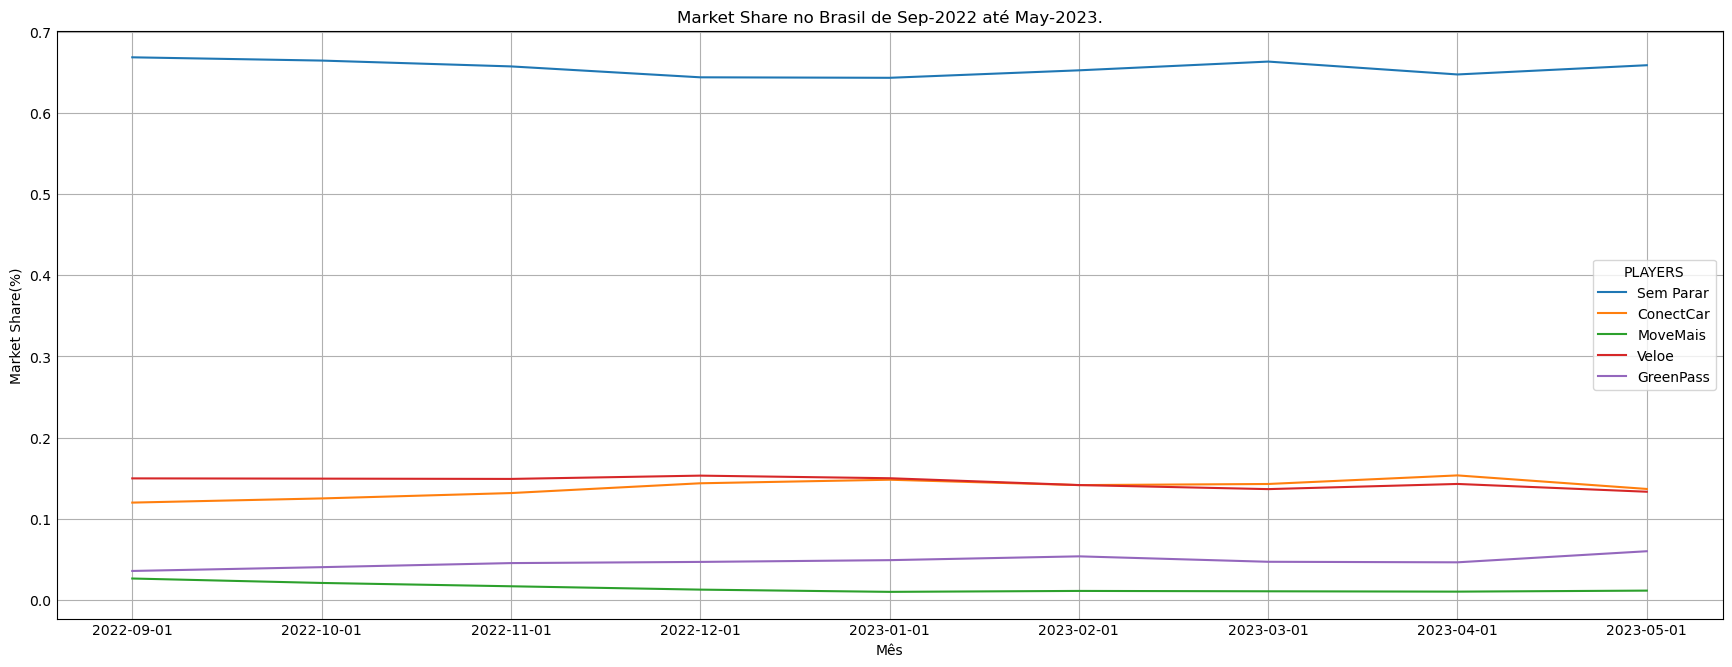

In [599]:
# CRIANDO O GRÁFICO

df_final_uf = df_final.rolling(1).mean().reset_index()
df_final_uf.dropna(inplace=True)
df_final_uf.rename(columns={'CGMP': 'Sem Parar','VELOE': 'Veloe'}, inplace = True)
qwe = pd.melt(df_final_uf,id_vars=['ano_mes'], value_vars=['Sem Parar', 'ConectCar','MoveMais','Veloe','GreenPass'])
qwe["ano_mes"] = qwe["ano_mes"].astype("string")
qwe["new_anomes"] = qwe['ano_mes'].str[:-4] + "-" + qwe['ano_mes'].str[4:6] + "-01"
qwe["newer_anomes"] = pd.to_datetime(qwe["new_anomes"],format='%Y-%m-%d')
mes_min = qwe["newer_anomes"].min().strftime("%b-%Y")
mes_max = qwe["newer_anomes"].max().strftime("%b-%Y")

#Configurando grafico 
figure, ax = plt.subplots(figsize=(17,6))
sns.lineplot(
    data=qwe, 
    x="new_anomes",
    y="value",
    hue="variable",
    markers = True,
    dashes = True)
plt.legend(title = "PLAYERS")
ax.set_ylabel('Market Share(%)')
ax.set_xlabel("Mês")
ax.set_title(f"Market Share no Brasil de {mes_min} até {mes_max}.")


C:\Users\raul.correa\AppData\Local\Temp\ipykernel_20716\835617231.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['uf'], dtype='object')
  df_mkt_new_copy_SP = df_mkt_new_copy_SP.rolling(1).mean().reset_index()


Text(0.5, 1.0, 'Market Share em SP de Jan-2022 até May-2023.')

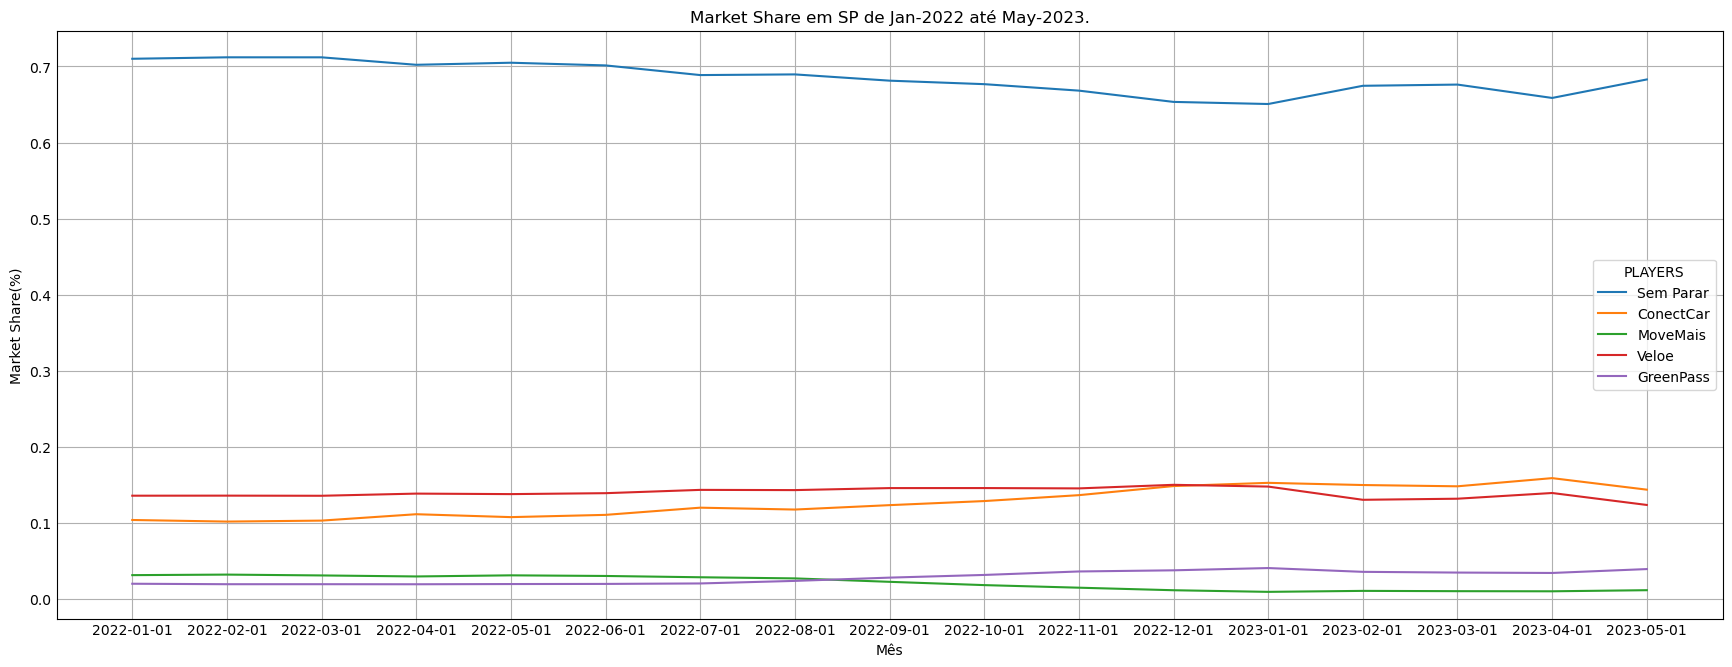

In [596]:
df_mkt_new_copy_SP = df_mkt_new_copy[df_mkt_new_copy['uf'] == 'SP']
df_mkt_new_copy_SP = df_mkt_new_copy_SP.rolling(1).mean().reset_index()
df_mkt_new_copy_SP.dropna(inplace=True)
df_mkt_new_copy_SP.rename(columns={'estim_market_CGMP': 'Sem Parar', 'estim_market_ConectCar': 'ConectCar','estim_market_MoveMais': 'MoveMais','estim_market_VELOE': 'Veloe','estim_market_GreenPass': 'GreenPass'}, inplace = True)
qwe = pd.melt(df_mkt_new_copy_SP,id_vars=['ano_mes'], value_vars=['Sem Parar', 'ConectCar',"MoveMais","Veloe","GreenPass"])
qwe["ano_mes"] = qwe["ano_mes"].astype("string")
qwe["new_anomes"] = qwe['ano_mes'].str[:-4] + "-" + qwe['ano_mes'].str[4:6] + "-01"
qwe["newer_anomes"] = pd.to_datetime(qwe["new_anomes"],format='%Y-%m-%d')
mes_min = qwe["newer_anomes"].min().strftime("%b-%Y")
mes_max = qwe["newer_anomes"].max().strftime("%b-%Y")



#Configurando grafico 
figure, ax = plt.subplots(figsize=(17,6))
sns.lineplot(
    data=qwe, 
    x="new_anomes",
    y="value",
    hue="variable",
    markers = True,
    dashes = True)
plt.legend(title = "PLAYERS")
ax.set_ylabel('Market Share(%)')
ax.set_xlabel("Mês")
ax.set_title(f"Market Share em SP de {mes_min} até {mes_max}.")

C:\Users\raul.correa\AppData\Local\Temp\ipykernel_20716\1169904105.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['uf'], dtype='object')
  df_mkt_new_copy_RJ = df_mkt_new_copy_RJ.rolling(1).mean().reset_index()


Text(0.5, 1.0, 'Market Share em RJ de Jan-2022 até May-2023.')

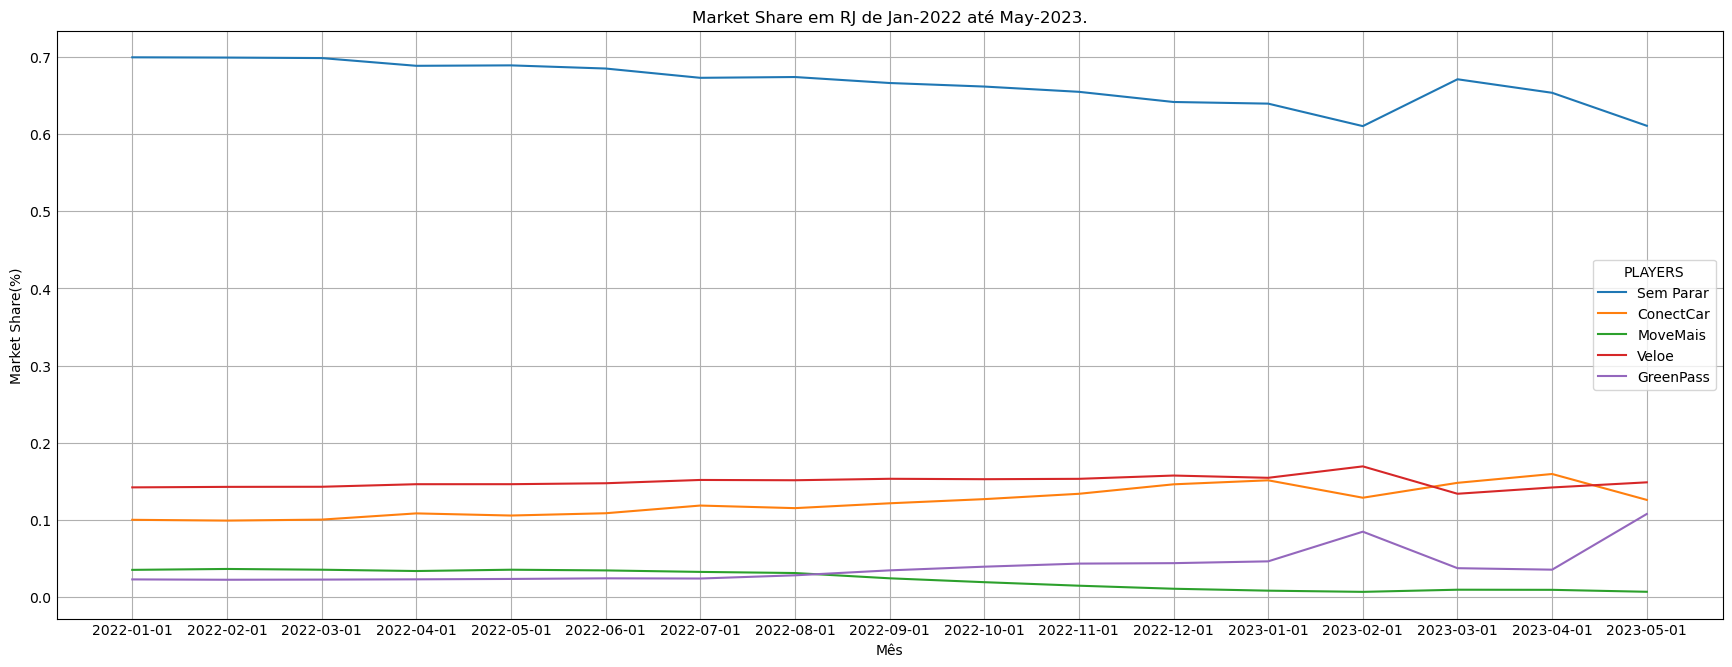

In [600]:
df_mkt_new_copy_RJ = df_mkt_new_copy[df_mkt_new_copy['uf'] == 'RJ']
df_mkt_new_copy_RJ = df_mkt_new_copy_RJ.rolling(1).mean().reset_index()
df_mkt_new_copy_RJ.dropna(inplace=True)
df_mkt_new_copy_RJ.rename(columns={'estim_market_CGMP': 'Sem Parar', 'estim_market_ConectCar': 'ConectCar','estim_market_MoveMais': 'MoveMais','estim_market_VELOE': 'Veloe','estim_market_GreenPass': 'GreenPass'}, inplace = True)
qwe = pd.melt(df_mkt_new_copy_RJ,id_vars=['ano_mes'], value_vars=['Sem Parar', 'ConectCar',"MoveMais","Veloe","GreenPass"])
qwe["ano_mes"] = qwe["ano_mes"].astype("string")
qwe["new_anomes"] = qwe['ano_mes'].str[:-4] + "-" + qwe['ano_mes'].str[4:6] + "-01"
qwe["newer_anomes"] = pd.to_datetime(qwe["new_anomes"],format='%Y-%m-%d')
mes_min = qwe["newer_anomes"].min().strftime("%b-%Y")
mes_max = qwe["newer_anomes"].max().strftime("%b-%Y")



#Configurando grafico 
figure, ax = plt.subplots(figsize=(17,6))
sns.lineplot(
    data=qwe, 
    x="new_anomes",
    y="value",
    hue="variable",
    markers = True,
    dashes = True)
plt.legend(title = "PLAYERS")
ax.set_ylabel('Market Share(%)')
ax.set_xlabel("Mês")
ax.set_title(f"Market Share em RJ de {mes_min} até {mes_max}.")